<a href="https://colab.research.google.com/github/Rohan20202/Global-Terrorism-Analysis/blob/main/GTD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q.** Global Terrorism Database (**GTD**) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (**START**), headquartered at the University of Maryland.






Explore and analyze the data to discover key findings pertaining to terrorist activities.

**Soln.** The scope of this project is to drill down the terrorist events around the world from 1970 through 2017.
In this task, we will be performing exploratory data analysis on the dataset "GlobalTerrorism" and try to find out the hot zone of terrorism.

**Import packages.**




In [94]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Loading Dataset**

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
my='/content/drive/MyDrive/Colab Notebooks/project/'

In [97]:
GTD=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/Global Terrorism Data.csv',encoding='ISO-8859-1')

**First five values of dataset**





In [98]:
GTD.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


**Rename some columns for better understanding.**

In [99]:
GTD.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive','success':'success'},inplace=True)

**Dropping some irrelevant column**

In [100]:
GTD=GTD[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

**Check the null values**

In [101]:
GTD.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

**Checking the dataset infromation.**

In [102]:
GTD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

**some basic information**

In [103]:
print("Country with the most attacks:",GTD['Country'].value_counts().idxmax())
print("State with the most attacks:",GTD['state'].value_counts().idxmax())
print("City with the most attacks:",GTD['city'].value_counts().index[1])
print("Region with the most attacks:",GTD['Region'].value_counts().idxmax())
print("Year with the most attacks:",GTD['Year'].value_counts().idxmax())
print("Month with the most attacks:",GTD['Month'].value_counts().idxmax())
print("Group with the most attacks:",GTD['Group'].value_counts().index[1])
print("Most Attack Types:",GTD['AttackType'].value_counts().idxmax())
print("most weapons used:",GTD['Weapon_type'].value_counts().idxmax())
print("most Targert by Terrorist:",GTD['Target'].value_counts().idxmax())

Country with the most attacks: Iraq
State with the most attacks: Baghdad
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion
most weapons used: Explosives
most Targert by Terrorist: Civilians


****Data Visualisation****

**Terrorist attacks over the world**

In [104]:
global_attacks=GTD['AttackType'].value_counts()
global_attacks

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

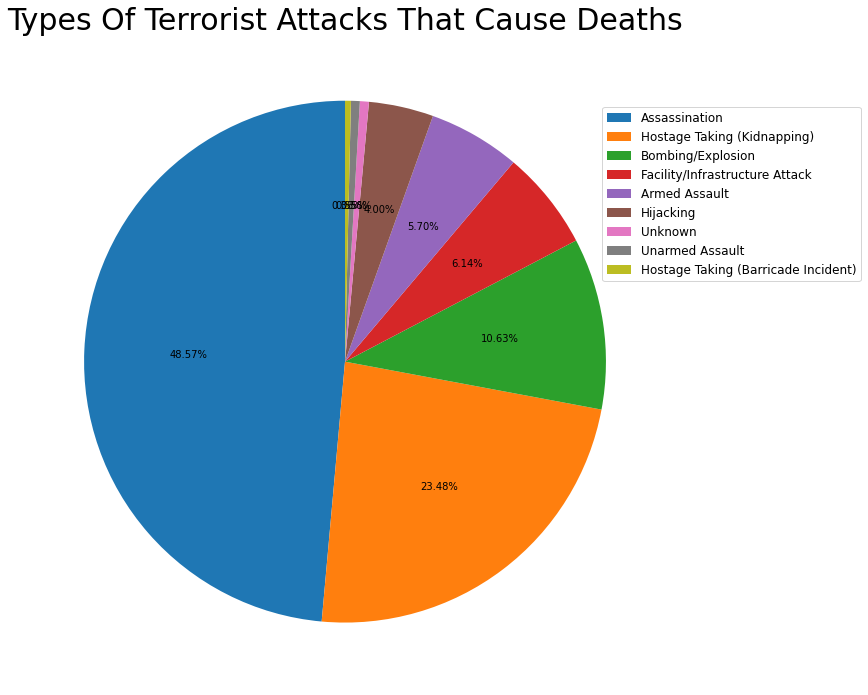

In [105]:
labels=global_attacks
fig, ax = plt.subplots(figsize=(12,12), subplot_kw=dict(aspect="equal"))
plt.pie(labels, startangle=90, autopct='%.2f%%')
plt.title('Types Of Terrorist Attacks That Cause Deaths',fontsize=30)
plt.legend(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'],loc='upper right',bbox_to_anchor = (1.3,0.9), fontsize=12)
plt.show()

**Terrorist targets over the world**

In [106]:
global_target=GTD['Target_type'].value_counts()
global_target

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target_type, dtype: int64

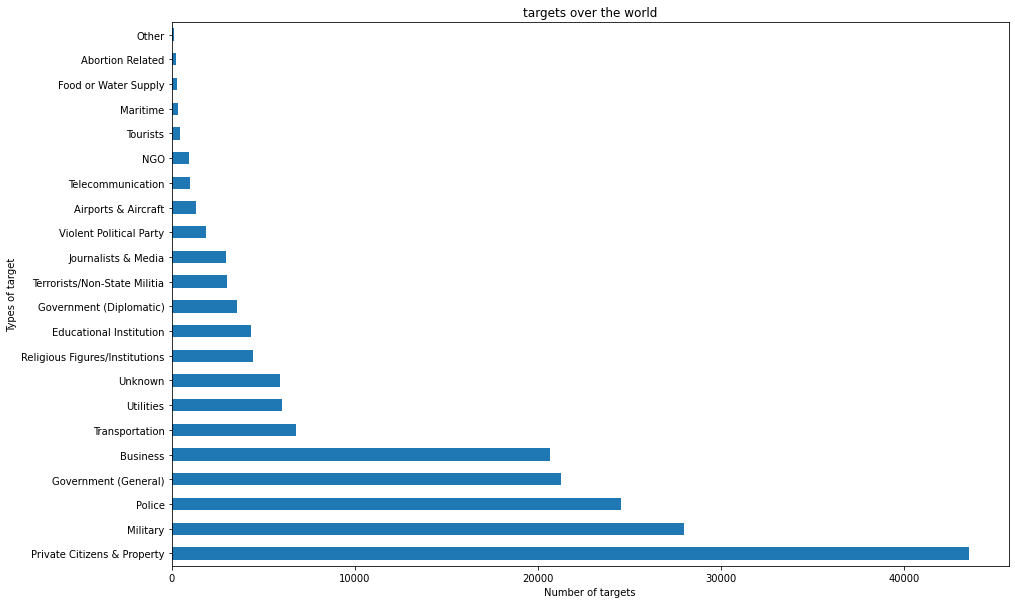

In [108]:
global_target.plot(kind='barh')

plt.xlabel("Number of targets")
plt.ylabel("Types of target")
plt.title("targets over the world")

plt.rcParams['figure.figsize']=(15,10)

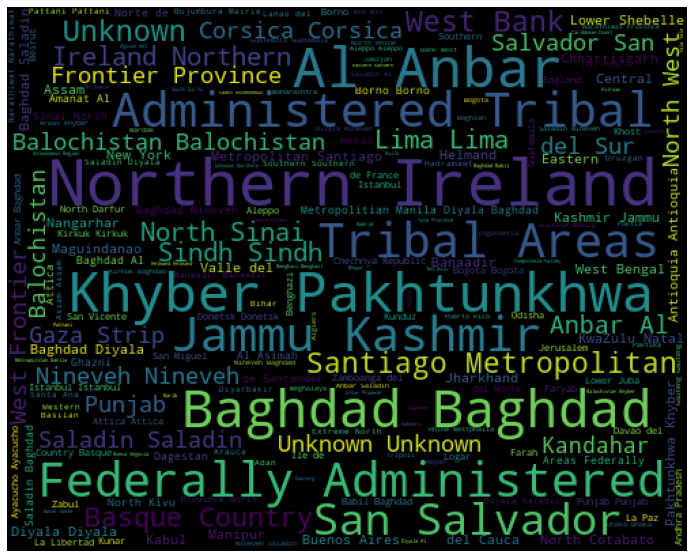

In [110]:
from wordcloud import WordCloud
from scipy import signal
state= GTD.state.dropna(0)
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(background_color = 'black',
                     width = 500,
                     height = 400).generate(' '.join(state))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

**Terrorist activities (1970-2017)**

In [111]:
Year=GTD['Year'].value_counts().sort_index()
Year

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

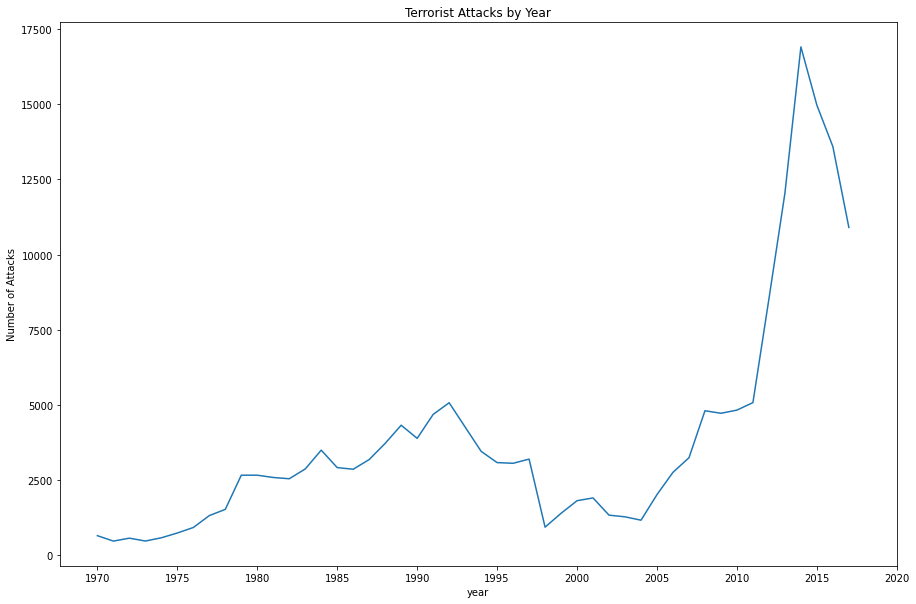

In [112]:
plt.plot(Year)

plt.xlabel("year")
plt.ylabel("Number of Attacks")
plt.title("Terrorist Attacks by Year")
plt.xticks(np.arange(1970, 2025, 5))
plt.show()

plt.rcParams['figure.figsize']=(12,10)

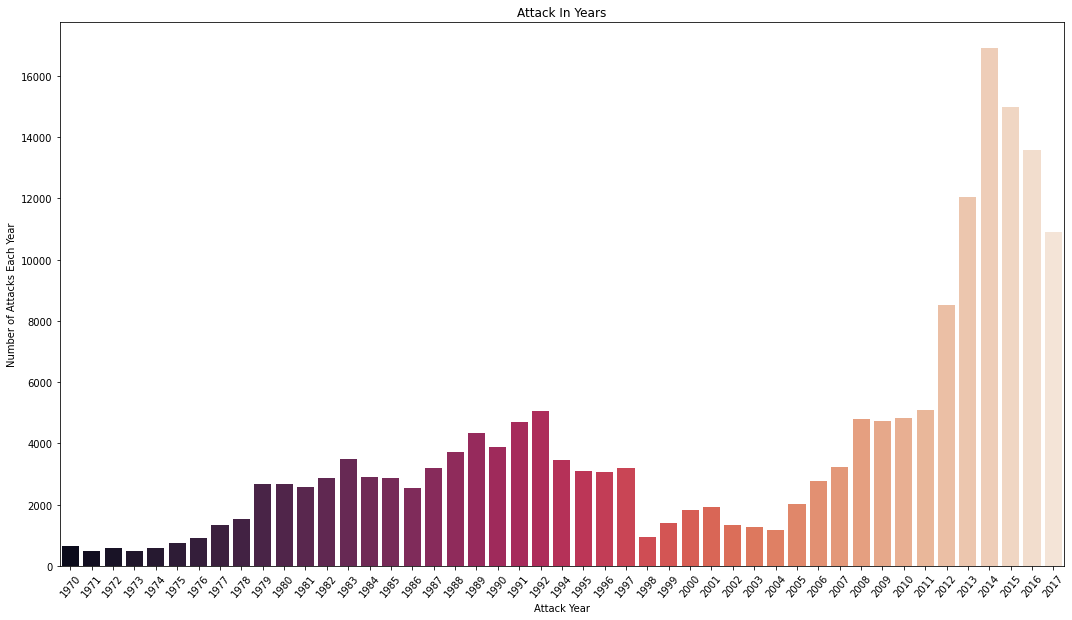

In [113]:
x_year = GTD['Year'].unique()
y_count_years = GTD['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 50)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks Each Year')
plt.title('Attack In Years')
plt.show()

**Terrorist activities by region (1970-2017)**

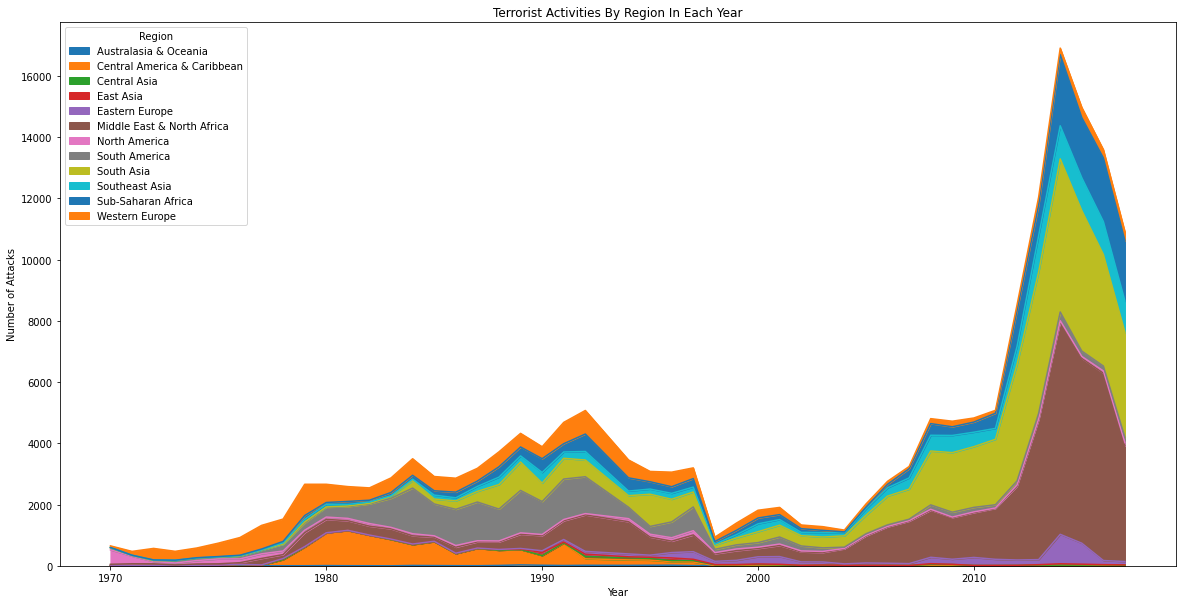

In [114]:
pd.crosstab(GTD.Year, GTD.Region).plot(kind='area',figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [115]:
GTD.Country.value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

**Top 10 countries affected by Terrorist Attacks**

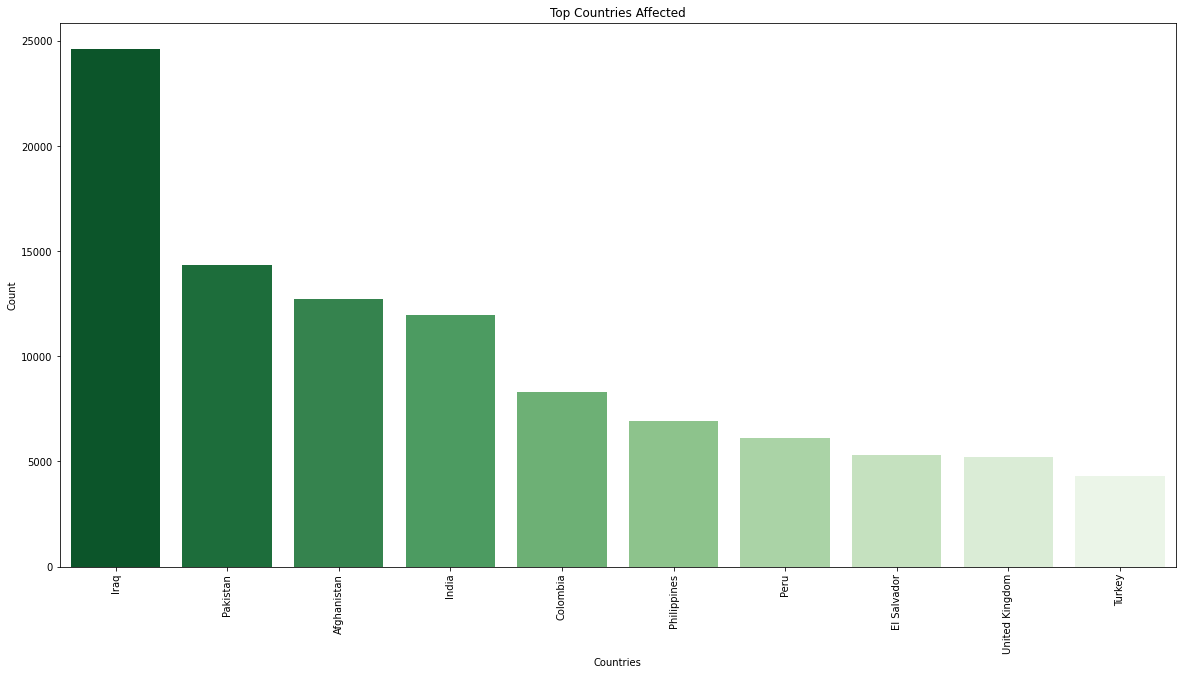

In [116]:
plt.subplots(figsize=(20,10))
sns.barplot(GTD['Country'].value_counts()[:10].index,GTD['Country'].value_counts()[:10].values,palette='Greens_r')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()


**Terrorist organization operations**

In [117]:
GTD.Group.value_counts()[1:20]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
National Liberation Army of Colombia (ELN)          1561
Tehrik-i-Taliban Pakistan (TTP)                     1351
Palestinians                                        1125
Houthi extremists (Ansar Allah)

**Total people killed in terrorism**

In [118]:
GTD['Killed']=GTD['Killed'].fillna(0)
GTD['Killed']=GTD['Killed'].astype(int)
total_kill=GTD.loc[:,'Killed']
print("Number of people died in terrorist attacks:",int(sum(total_kill.dropna())))

Number of people died in terrorist attacks: 411868


**Types of attacks these deaths were made of**

In [120]:
attacks_type=GTD.loc[:,'AttackType']

In [121]:
people_kill= pd.concat([total_kill,attacks_type],axis=1)
people_kill.head()

,Killed,AttackType
0,1,Assassination
1,0,Hostage Taking (Kidnapping)
2,1,Assassination
3,0,Bombing/Explosion
4,0,Facility/Infrastructure Attack


In [122]:
people_kill_by= people_kill.pivot_table(columns='AttackType',values='Killed',aggfunc='sum')
people_kill_by

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297,24920,157321,3642,3718,4478,24231,880,32381


**Number of people Killed in Terrorist Attacks (COUNTRYWISE)**

In [123]:
country_data=GTD.loc[:,'Country']

In [124]:
GTD['Killed']=GTD['Killed'].fillna(0)
GTD['Killed']=GTD['Killed'].astype(int)
total_kill=GTD.loc[:,'Killed']

In [125]:
people_kill_country=pd.concat([country_data,total_kill],axis=1)

In [126]:
people_die_country=people_kill_country.pivot_table(columns='Country',values='Killed',aggfunc='sum')
people_die_country

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia-Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cuba,...,Soviet Union,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384,42,11066,0,3043,0,490,37,23,30,258,1,44,1244,76,14,79,3,0,9,42,79,11,203,0,28,134,4205,543,2347,365,1990,1119,228,1008,14698,1,17,248,8,...,96,1288,15530,0,2,3883,29,6,22,74,15229,60,307,73,2742,76,6,351,6888,3,3065,2261,123,3410,3771,6,68,0,0,227,1,0,1500,97,1,8776,119,324,70,154


**Now lets talk about INDIA**

In [127]:
MY_CO=GTD[GTD['Country'] == 'India']
MY_CO.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
1186,1972,2,22,India,Delhi,South Asia,New Delhi,28.585836,77.153336,Hijacking,0,0.0,B-747,NaN,Palestinians,Airports & Aircraft,Explosives,NaN
2764,1975,1,2,India,Bihar,South Asia,Samastipur,25.863042,85.781004,Bombing/Explosion,4,0.0,Lalit Narayan Mishra and a legislator,"1/2/1975: The Indian Railway Minister, Lalit N...",Ananda Marga,Government (General),Explosives,Unknown
3857,1976,5,26,India,Delhi,South Asia,New Delhi,28.585836,77.153336,Bombing/Explosion,0,0.0,New Delhi airport,NaN,Unknown,Airports & Aircraft,Explosives,NaN
5327,1977,9,28,India,Maharashtra,South Asia,Bombay,19.075984,72.877656,Hijacking,0,0.0,DC-8,NaN,Japanese Red Army (JRA),Airports & Aircraft,Firearms,NaN
7337,1979,1,13,India,Assam,South Asia,Unknown,26.200605,92.937574,Armed Assault,0,NaN,patrol,NaN,Naga People,Police,Firearms,NaN


**Number of people Killed in Terrorist Attacks (STATE)**

In [128]:
# First we see all the states India affected by terrorism.
sta=(GTD['Country']=='India')
ind_sta=GTD.loc[sta]['state'].unique()
ind_sta

array(['Delhi', 'Bihar', 'Maharashtra', 'Assam', 'Manipur', 'Mizoram',
       'Andhra Pradesh', 'Unknown', 'Jharkhand', 'Tamil Nadu',
       'Uttar Pradesh', 'West Bengal', 'Nagaland', 'Gujarat',
       'Chandigarh', 'Rajasthan', 'Punjab', 'Chhattisgarh', 'Tripura',
       'Haryana', 'Jammu and Kashmir', 'Himachal Pradesh', 'Karnataka',
       'Uttaranchal', 'Madhya Pradesh', 'Orissa', 'Kerala', 'Odisha',
       'Meghalaya', 'Sikkim', 'Goa', 'Andhra pradesh',
       'Arunachal Pradesh', 'Puducherry', 'Telangana'], dtype=object)

In [129]:
sta=(GTD['Country']=='India')
ind_sta=GTD.loc[sta]['state']
ind_sta

1186                  Delhi
2764                  Bihar
3857                  Delhi
5327            Maharashtra
7337                  Assam
                ...        
181663               Kerala
181665         Chhattisgarh
181672    Jammu and Kashmir
181684                Assam
181689              Manipur
Name: state, Length: 11960, dtype: object

In [130]:
GTD['Killed']=GTD['Killed'].fillna(0)
GTD['Killed']=GTD['Killed'].astype(int)
total_kill=GTD.loc[:,'Killed']

In [131]:
peoplekill= pd.concat([total_kill,ind_sta],axis=1).dropna(0)
peoplekill.head()

,Killed,state
1186,0,Delhi
2764,4,Bihar
3857,0,Delhi
5327,0,Maharashtra
7337,0,Assam


In [132]:
kill_data_sta= peoplekill.pivot_table(columns='state',values='Killed',aggfunc='sum')
kill_data_sta

state,Andhra Pradesh,Andhra pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Orissa,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Unknown,Uttar Pradesh,Uttaranchal,West Bengal
Killed,543,33,14,2112,765,192,1465,439,2,159,268,126,4079,796,92,12,191,1010,747,134,32,190,221,276,0,2751,119,0,248,4,358,673,502,117,671


In [133]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

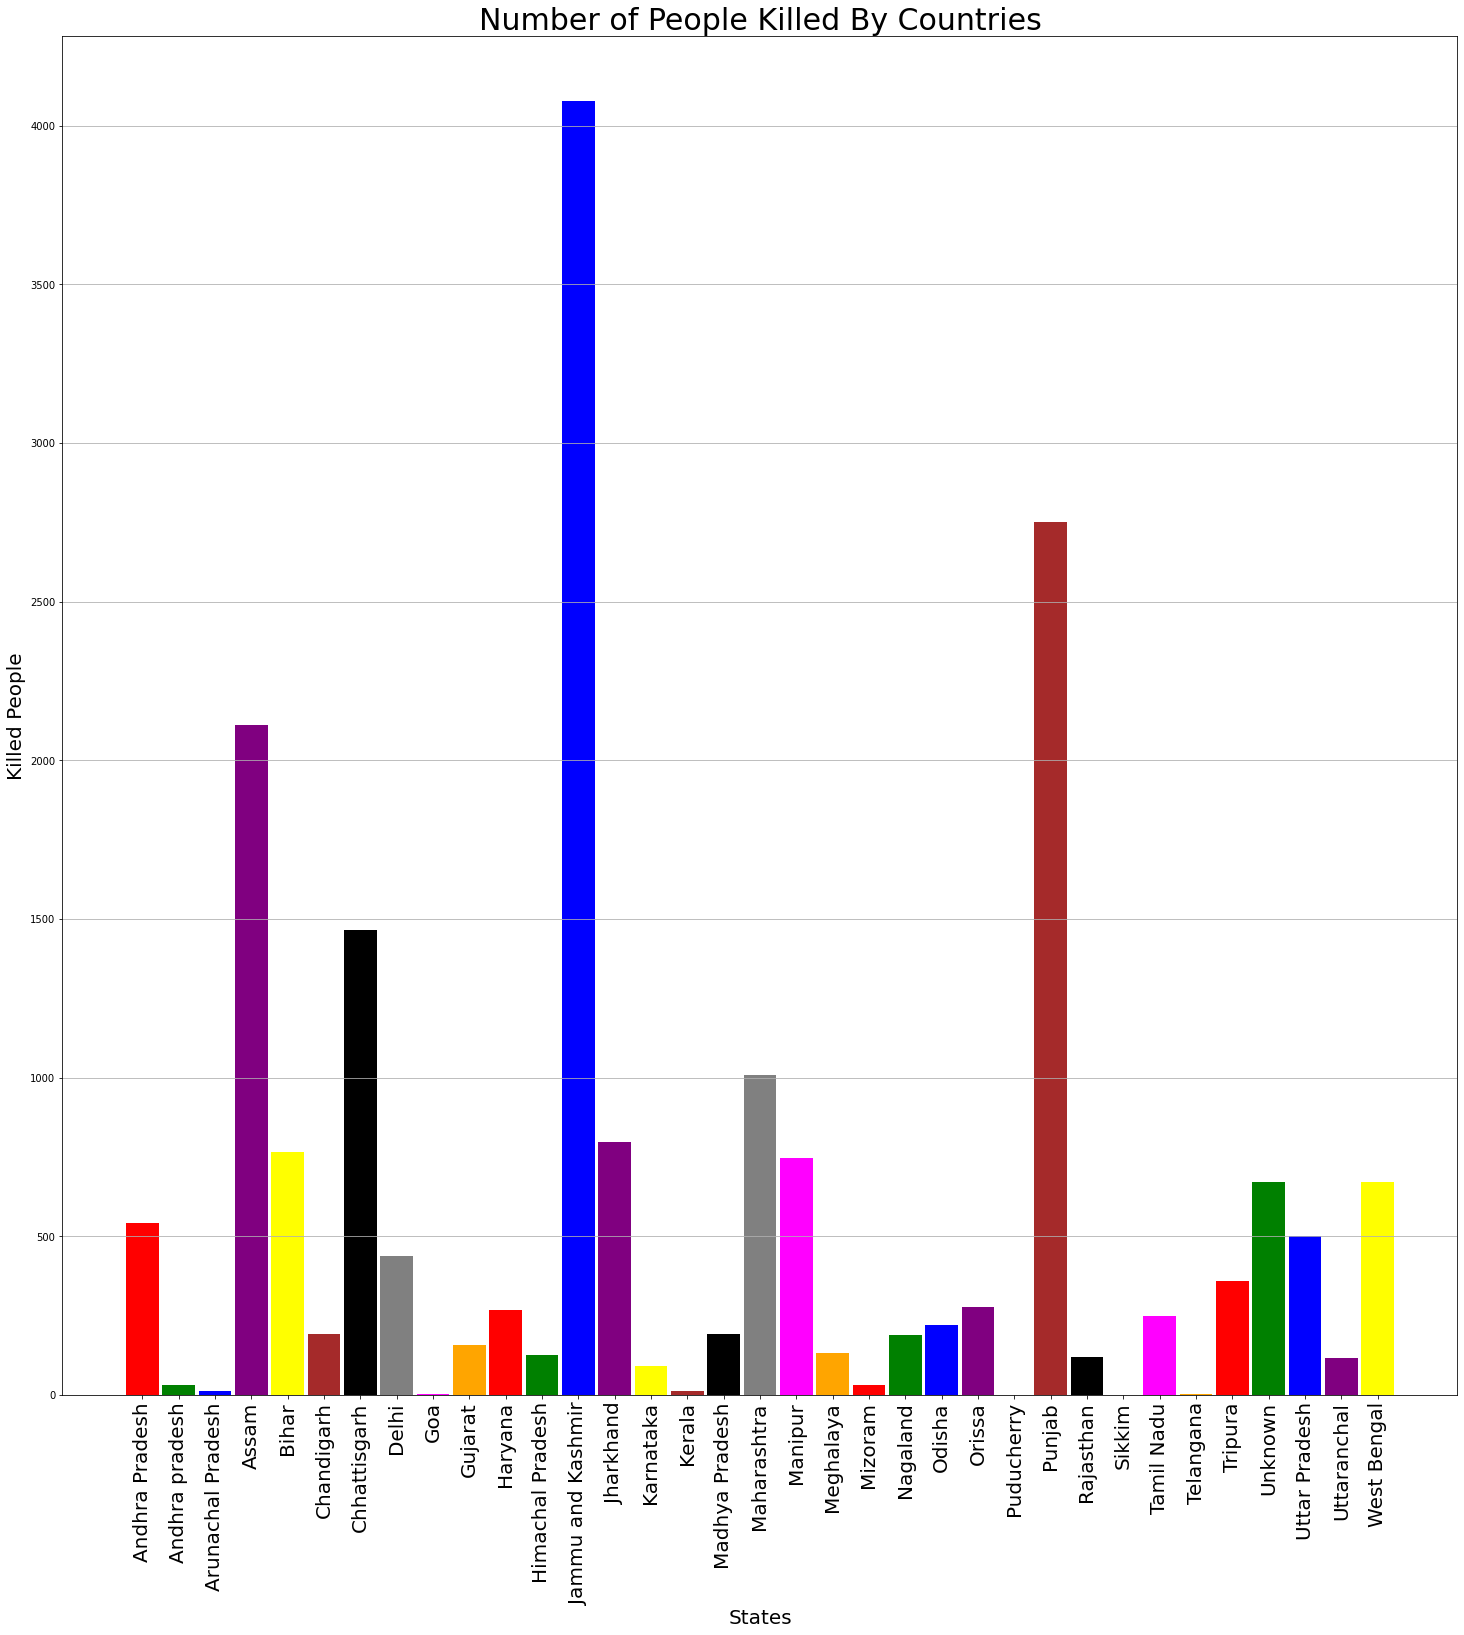

In [134]:
labels = kill_data_sta.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = kill_data_sta.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=30
fig_size[1]=30
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('States', fontsize = 20)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number of People Killed By Countries', fontsize = 30)
# print(fig_size)
plt.show()


**Number of people Killed in Terrorist Attacks (CITY)**

In [135]:
# # First we see all the cities India affected by terrorism.
ind_cit=(GTD['Country']=='India')
list(GTD.loc[ind_cit]['city'].unique())

['New Delhi',
 'Samastipur',
 'Bombay',
 'Unknown',
 'Imphal',
 'Aizawl',
 'Amapur',
 'Raisikah',
 'Champhai',
 'Jamshedpur',
 'Chennai',
 'Chiaplant',
 'Tindol',
 'Calcutta',
 'Tirupattur',
 'Gauhati',
 'Jorhat',
 'Massad',
 'Chandigarh',
 'Jodhpur',
 'Amritsar',
 'Tipaimukh',
 'Guwahati',
 'Harchowal',
 'Mothan Wala',
 'Qadian',
 'Baloda Bazar',
 'Kanpur',
 'Sultanpur Lodhi',
 'Jalandhar',
 'Sri Muktsar Sahib',
 'Ludhiana',
 'Delhi',
 'Tarn Taran',
 'Dimapur',
 'Bhatinda',
 'Hoshiapur',
 'Pehowa',
 'Ferozepur district',
 'Baramura',
 'Rupnagar',
 'Rahon',
 'Patiala',
 'Kalanaur',
 'Bhela',
 'Ambala',
 'Jogiana',
 'Amarkot',
 'Firozpur',
 'Jammu',
 'Ferozepur',
 'Mansa district',
 'Moga',
 'Batala',
 'Dhariwal',
 'Patiala district',
 'Hoshiarpur',
 'Lakhuwal',
 'Khanewal',
 'Tezpur',
 'Gurdaspur',
 'Sootea',
 'Ludhiana district',
 'Subaisingh',
 'Nalavdar',
 'Bathinda district',
 'Bhrigudas Bari',
 'Madhaybrar',
 'Hisar',
 'Meerut',
 'Ahmedabad',
 'Sherpur',
 'Jalandhar district',
 'T

In [136]:
cit=(GTD['Country']=='India')
ind_cit=GTD.loc[cit]['city']
ind_cit

1186          New Delhi
2764         Samastipur
3857          New Delhi
5327             Bombay
7337            Unknown
              ...      
181663    Koothuparamba
181665         Toylanka
181672        Lethapora
181684          Hungrum
181689           Imphal
Name: city, Length: 11960, dtype: object

In [137]:
GTD['Killed']=GTD['Killed'].fillna(0)
GTD['Killed']=GTD['Killed'].astype(int)
total_kill=GTD.loc[:,'Killed']

In [138]:
peoplekill= pd.concat([total_kill,ind_cit],axis=1).dropna(0)
peoplekill.head()

,Killed,city
1186,0,New Delhi
2764,4,Samastipur
3857,0,New Delhi
5327,0,Bombay
7337,0,Unknown


In [139]:
kill_data_cit= peoplekill.pivot_table(columns='city',values='Killed',aggfunc='sum')
kill_data_cit

city,Aankro,Aatpal,Abhapalli,Abhayapuri,Abhoynagar,Abohar,Aboi,Achabal,Achanbigei,Acheli,Adaba,Adava,Adavali,Adijan,Adilabad,Adilabad District,Adityapur,Admadpur,Adugre,Adukkamparai,Agali,Agarpara,Agartala,Agartala district,Aglar,Agra,Ahem Sharief,Aheri,Ahiapur,Ahmadgarh,Ahmedabad,Aibol,Aidoba,Aigejang,Aimol Satu,Airkata,Aishi,Aishmuqam,Aizawl,Ajarbal,...,Yaripok,Yaripora,Yavatmal district,Yelahanka,Yelamanda,Yelchil,Yerkad,Yetnaram,Yukharia,Yusufpur,Zacheldara,Zainakote,Zainapora,Zakura,Zalembung,Zangam,Zasoo Tahab,Zewan,Zhutovi,Zira,Zirpora,Zojipel,Zokhawthar,Zunheboto district,agartala,amritsar,anantnag,batala,chintpurani,gurdaspur district,guwahati,kangan,khargone,kokrajhar district,ludhiana,nalbari district,new delhi,runikhata,srinagar,uri
Killed,3,1,5,1,0,20,0,6,0,0,0,0,1,0,0,7,0,2,0,0,1,1,15,7,1,14,1,10,0,16,58,0,0,0,1,0,0,1,2,1,...,0,11,0,1,0,0,0,1,0,0,2,1,2,6,0,0,0,1,1,3,0,0,3,0,3,15,0,1,16,2,0,0,1,3,1,10,3,10,0,3


In [140]:
ind_cit.value_counts()[:20]

Srinagar                   658
Unknown                    624
Imphal                     426
New Delhi                  157
Amritsar                   138
Sopore                     102
Ludhiana                    77
Guwahati                    77
Anantnag                    76
Jammu                       57
Latehar district            55
Bijapur district            51
Sukma district              49
Darjeeling                  47
Chandigarh                  47
Delhi                       45
Pulwama                     42
Dantewada district          41
West Midnapore district     41
Dimapur                     41
Name: city, dtype: int64

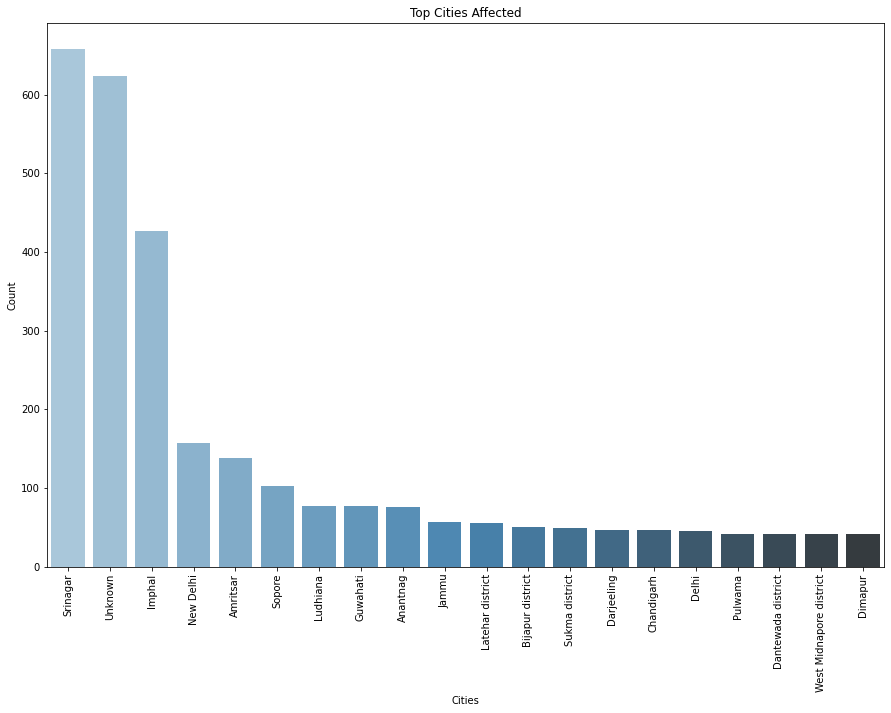

In [141]:
plt.subplots(figsize=(15,10))
sns.barplot(ind_cit.value_counts()[:20].index,ind_cit.value_counts()[:20].values,palette='Blues_d')
plt.title('Top Cities Affected')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()


**Last 10 year attacks (India,Pakistan,Afghanistan)**

In [142]:
ind=pd.DataFrame()
ind=GTD[(GTD['Country']=='India') & (GTD['Year'] > 2005)]
ind.Country.value_counts()

India    7870
Name: Country, dtype: int64

In [143]:
pak=pd.DataFrame()
pak=GTD[(GTD['Country']=='Pakistan') & (GTD['Year'] > 2005)]
pak.Country.value_counts()

Pakistan    12230
Name: Country, dtype: int64

In [144]:
afg=pd.DataFrame()
afg=GTD[(GTD['Country']=='Afghanistan') & (GTD['Year'] > 2005)]
afg.Country.value_counts()

Afghanistan    12198
Name: Country, dtype: int64

In [145]:
year_1=ind.Year.value_counts().sort_index()
year_2=pak.Year.value_counts().sort_index()
year_3=afg.Year.value_counts().sort_index()

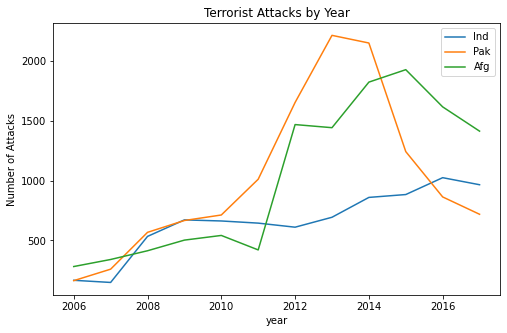

In [147]:
plt.plot(year_1)
plt.plot(year_2)
plt.plot(year_3)
plt.legend(['Ind','Pak','Afg'],loc='upper right')
plt.xlabel("year")
plt.ylabel("Number of Attacks")
plt.title("Terrorist Attacks by Year")
plt.show()

plt.rcParams['figure.figsize']=(8,5)